# Importaciones

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.datasets import mnist
from scipy.ndimage import center_of_mass, shift

2025-04-07 10:59:11.611914: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 10:59:12.834851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744016353.269393   19259 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744016353.393757   19259 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744016354.395727   19259 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Comprobar GPU

Lo primero que se debe comprobar es si `TensorFlow` está haciendo uso de la **GPU**, para tener mayor potencia de procesamiento.

In [2]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the Tensor on GPU #0:  
True


I0000 00:00:1744016379.665436   19259 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


# Data Processing

## Dataset

In [3]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar la forma de los datos
print(f"Forma de x_train: {x_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de x_test: {x_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Forma de y_test: (10000,)


## Análisis exploratorio y visualización

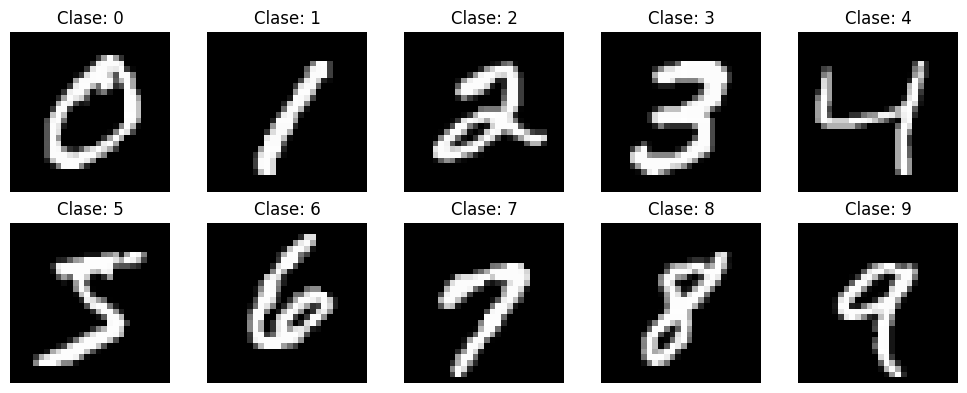

In [4]:
# Mostrar una muestra de cada clase (0-9)
plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.where(y_train == i)[0][0]  # primer índice de cada clase
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap='gray')
    plt.title(f"Clase: {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

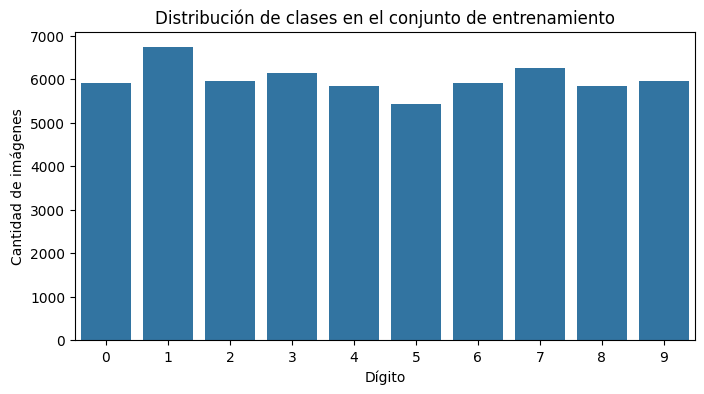

In [5]:
# Contar ocurrencias de cada etiqueta
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Dígito")
plt.ylabel("Cantidad de imágenes")
plt.show()

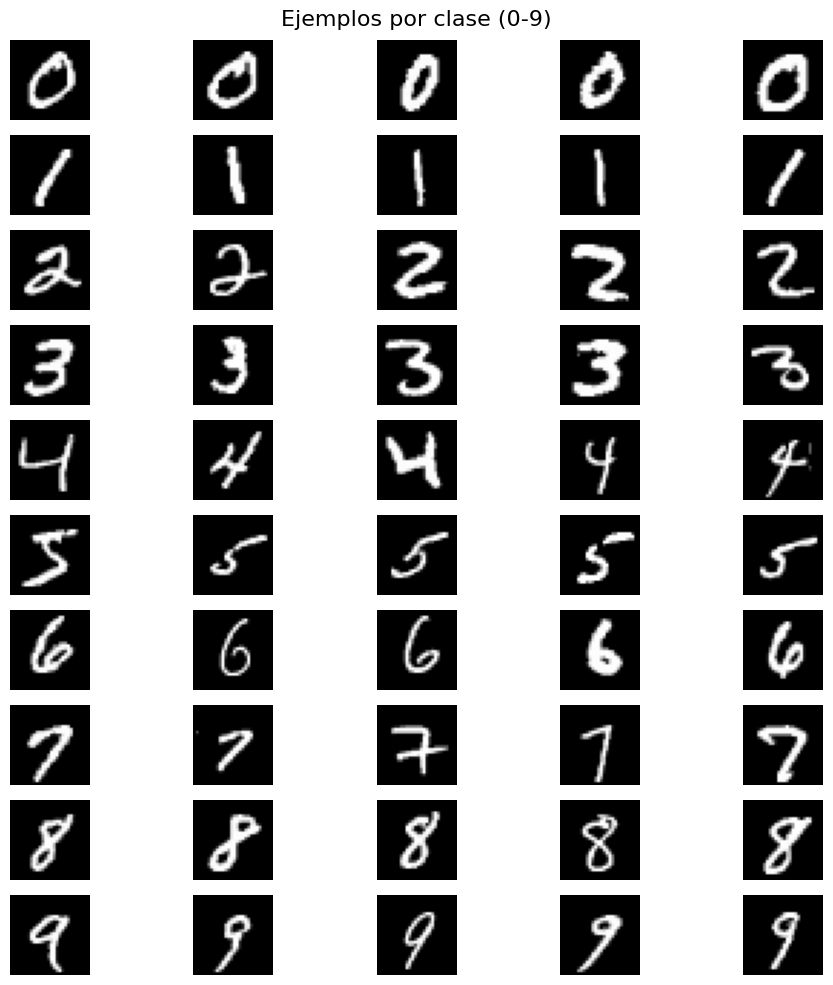

In [6]:
# Mostrar 5 imágenes por cada clase
plt.figure(figsize=(10, 10))
for i in range(10):  # clases 0 al 9
    indices = np.where(y_train == i)[0][:5]  # 5 primeras imágenes de cada clase
    for j, idx in enumerate(indices):
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(x_train[idx].squeeze(), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.ylabel(str(i), fontsize=12)  # poner etiqueta al principio de la fila
plt.suptitle("Ejemplos por clase (0-9)", fontsize=16)
plt.tight_layout()
plt.show()

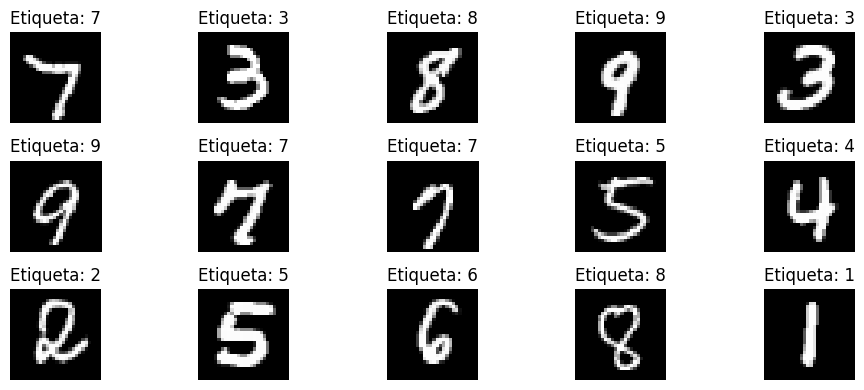

In [7]:
# Mostrar algunos dígitos que podrían parecer ruidosos o raros visualmente
np.random.seed(42)
random_idxs = np.random.choice(len(x_train), size=15, replace=False)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(random_idxs):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap='gray')
    plt.title(f"Etiqueta: {y_train[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

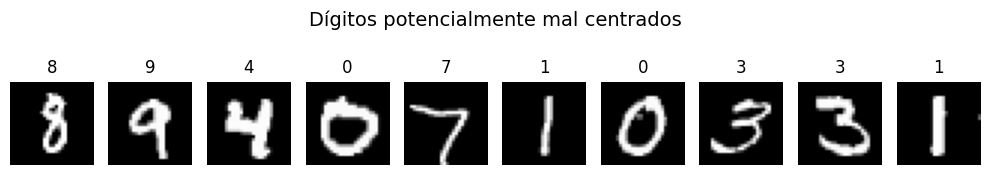

In [9]:
centers = np.array([center_of_mass(img.squeeze()) for img in x_train])
center_dist = np.linalg.norm(centers - np.array([14, 14]), axis=1)

# Mostrar imágenes con centro muy alejado del centro ideal (14,14)
off_center_indices = np.argsort(center_dist)[-10:]

plt.figure(figsize=(10, 2))
for i, idx in enumerate(off_center_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap='gray')
    plt.title(f"{y_train[idx]}")
    plt.axis('off')
plt.suptitle("Dígitos potencialmente mal centrados", fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
# Función para centrar una imagen
def center_image(img):
    cy, cx = center_of_mass(img)
    shift_y = 14 - cy
    shift_x = 14 - cx
    return shift(img, shift=[shift_y, shift_x], mode='constant', cval=0.0)

# Aplicar a todas las imágenes del dataset
x_train = np.array([center_image(img.squeeze()) for img in x_train])
x_test = np.array([center_image(img.squeeze()) for img in x_test])

# Agregar la dimensión del canal para usar en Conv2D
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]